In [1]:
import sys
import datetime
import pandas as pd

path_root = '../../..'
sys.path.append(f'{path_root}/')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = 'puglia'

path_data = f'{path_root}/data'
path_img_root =  f'{path_data}/imgs/grafici/{level}/{region_name}'
path_csv = f'{path_data}/csv'
csv_in_name = f'{path_csv}/{level}/covid19-{region_name}.csv'

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,16,Puglia,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,16,Puglia,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,16,Puglia,1,0,1,0,1,1,1,...,0.0,0.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,16,Puglia,1,0,1,2,3,2,2,...,0.0,242.0,0.0,2.0,0.00,33.33,0.83,0.00,0.00,200.00
4,2020-02-29T17:00:00,16,Puglia,1,0,1,2,3,0,0,...,0.0,10.0,0.0,0.0,0.00,33.33,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2021-02-19T17:00:00,16,Puglia,1261,163,1424,31906,33330,-2399,874,...,27.0,9141.0,3921.0,-2381.0,11.45,4.27,9.56,22.29,2.52,-6.71
361,2021-02-20T17:00:00,16,Puglia,1251,164,1415,31669,33084,-246,905,...,23.0,9880.0,3852.0,-237.0,11.59,4.28,9.16,23.49,0.61,-0.74
362,2021-02-21T17:00:00,16,Puglia,1262,169,1431,31767,33198,114,758,...,6.0,7083.0,1683.0,98.0,11.81,4.31,10.70,45.04,3.05,0.34
363,2021-02-22T17:00:00,16,Puglia,1282,160,1442,31253,32695,-503,343,...,17.0,4161.0,2530.0,-514.0,11.10,4.41,8.24,13.56,-5.33,-1.52


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 2, 23, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 823
Nuovi tamponi: 12067.0
Percentuale nuovi positivi/nuovi tamponi: 6.800000000000001 %
Nuovi guariti: 1044.0
Nuovi deceduti: 32.0
Variazione positivi ricoverati con sintomi: -17.0
Variazione positivi in terapia intensiva: 4.0
Variazione positivi in isolamento dimiciliare: -240.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 2, 23, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-25T17:00:00,16,Puglia,1413,166,1579,52010,53589,458,1011,...,26.0,7540.0,1591.0,471.0,10.51,2.95,13.41,63.54,-2.35,0.86
1,2020-12-26T17:00:00,16,Puglia,1435,158,1593,52197,53790,201,544,...,25.0,2391.0,857.0,187.0,9.92,2.96,22.75,63.48,-4.82,0.38
2,2020-12-27T17:00:00,16,Puglia,1444,154,1598,52040,53638,-152,221,...,12.0,1748.0,1544.0,-157.0,9.64,2.98,12.64,14.31,-2.53,-0.28
3,2020-12-28T17:00:00,16,Puglia,1494,139,1633,51524,53157,-481,645,...,47.0,4147.0,3036.0,-516.0,8.51,3.07,15.55,21.25,-9.74,-0.90
4,2020-12-29T17:00:00,16,Puglia,1466,136,1602,51231,52833,-324,749,...,34.0,9668.0,3637.0,-293.0,8.49,3.03,7.75,20.59,-2.16,-0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-02-19T17:00:00,16,Puglia,1261,163,1424,31906,33330,-2399,874,...,27.0,9141.0,3921.0,-2381.0,11.45,4.27,9.56,22.29,2.52,-6.71
57,2021-02-20T17:00:00,16,Puglia,1251,164,1415,31669,33084,-246,905,...,23.0,9880.0,3852.0,-237.0,11.59,4.28,9.16,23.49,0.61,-0.74
58,2021-02-21T17:00:00,16,Puglia,1262,169,1431,31767,33198,114,758,...,6.0,7083.0,1683.0,98.0,11.81,4.31,10.70,45.04,3.05,0.34
59,2021-02-22T17:00:00,16,Puglia,1282,160,1442,31253,32695,-503,343,...,17.0,4161.0,2530.0,-514.0,11.10,4.41,8.24,13.56,-5.33,-1.52


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

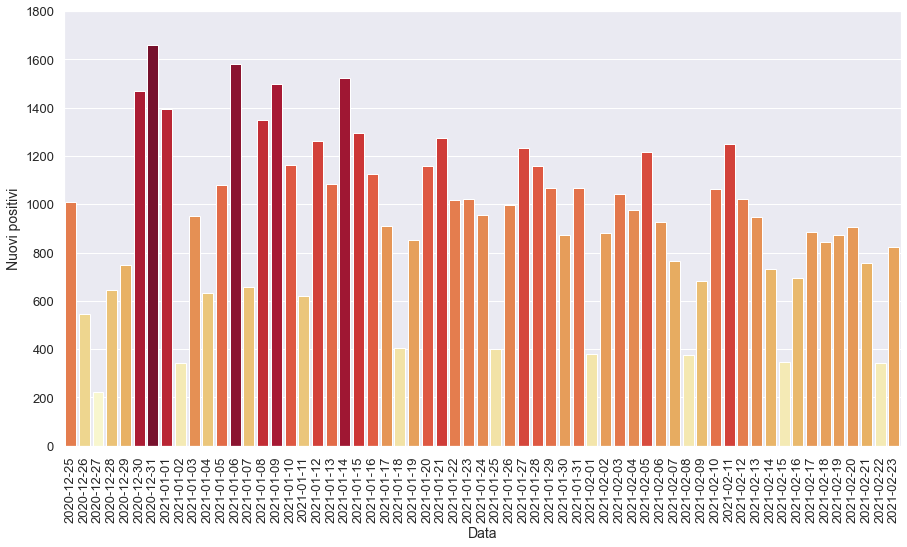

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

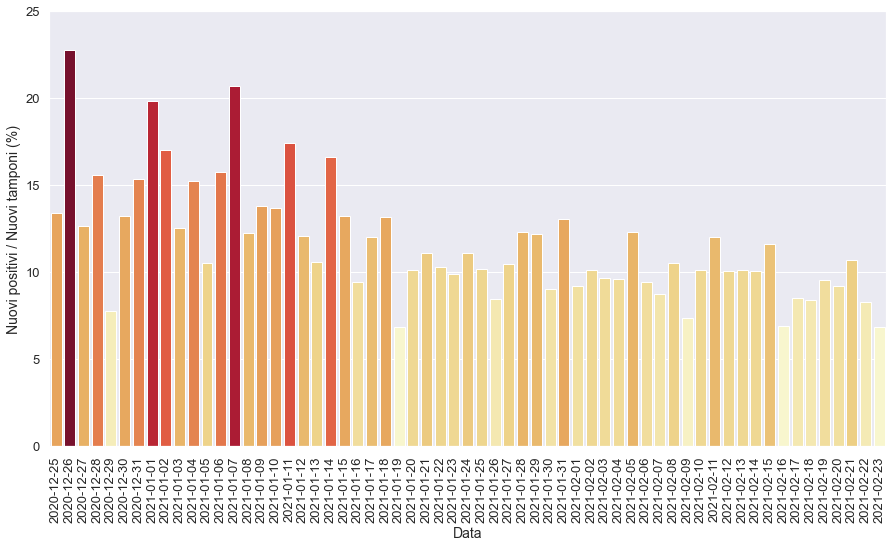

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

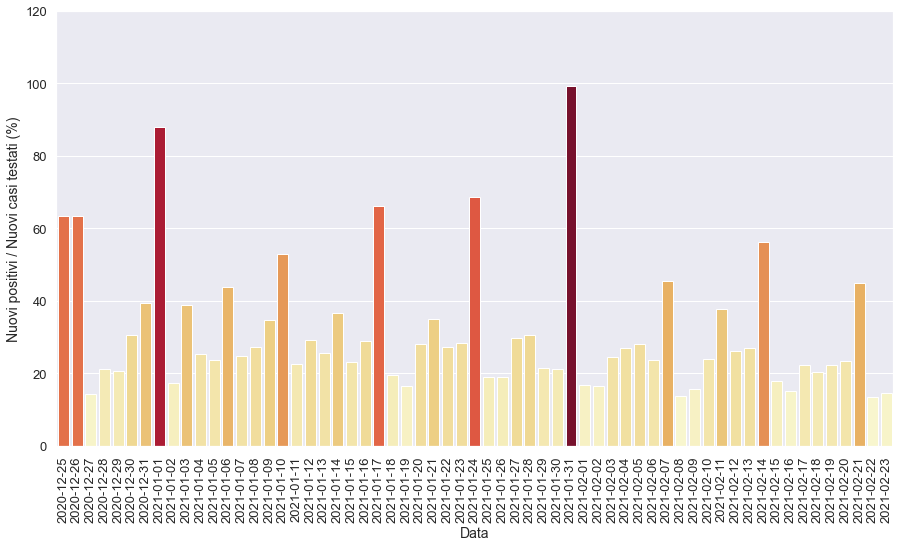

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

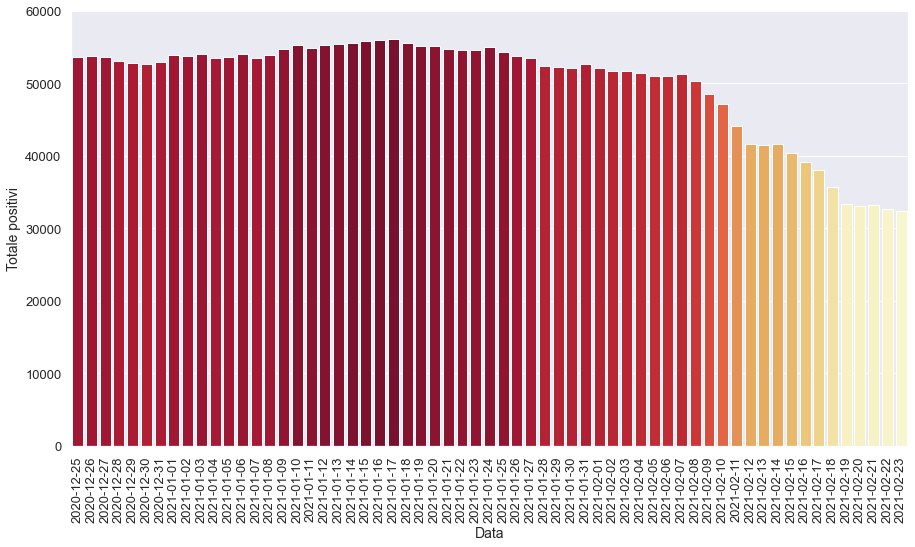

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

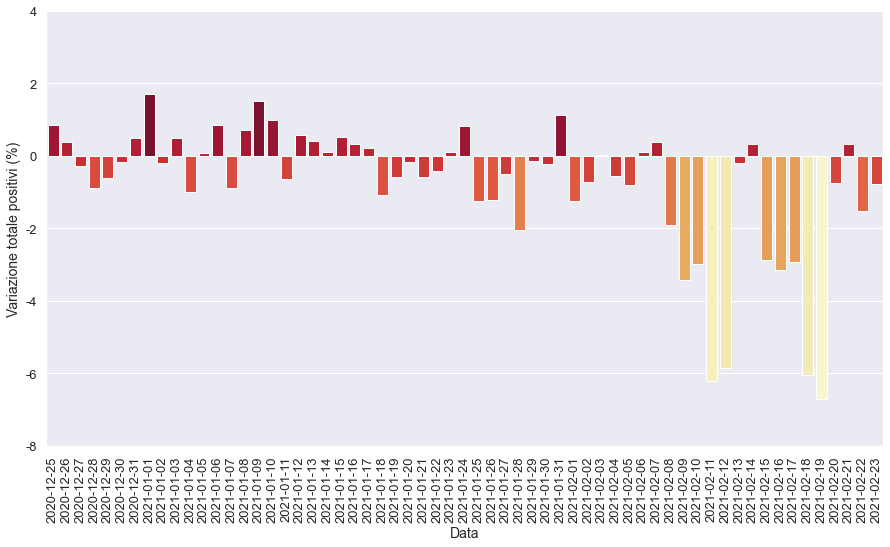

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

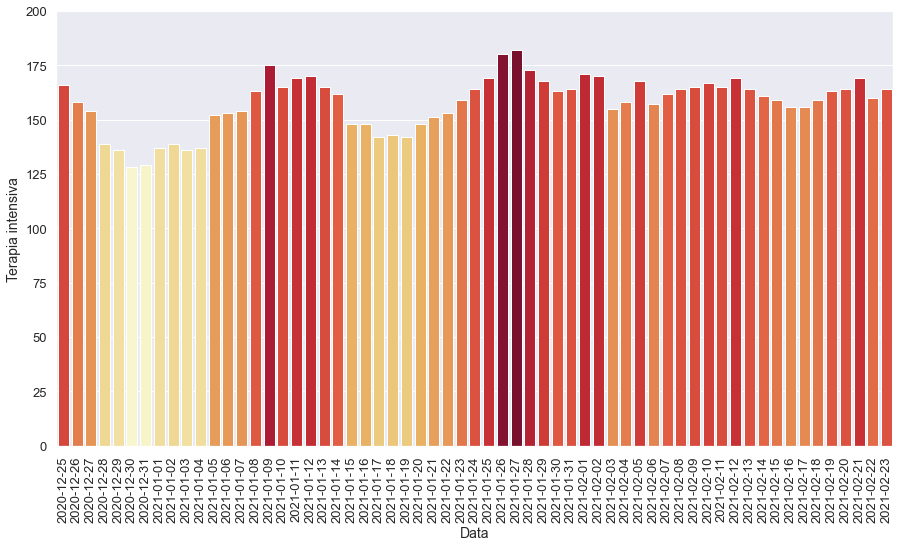

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

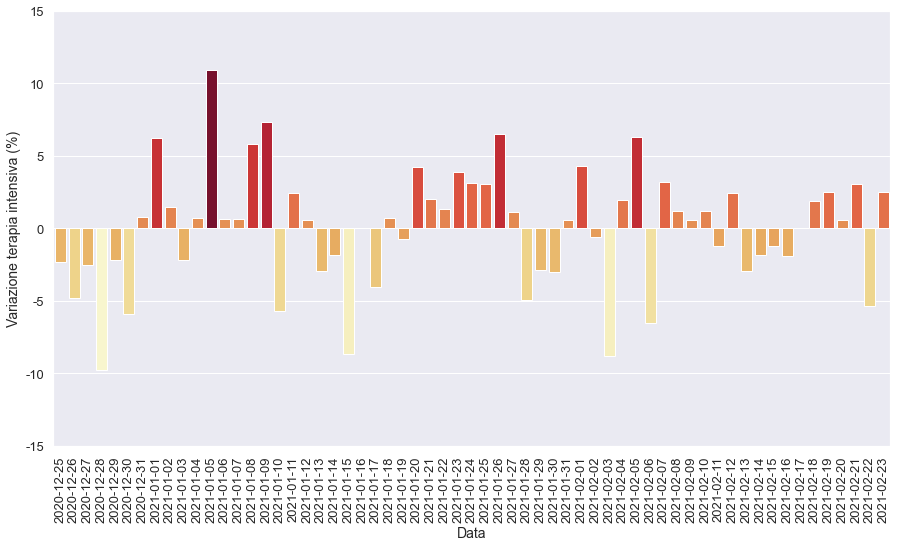

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

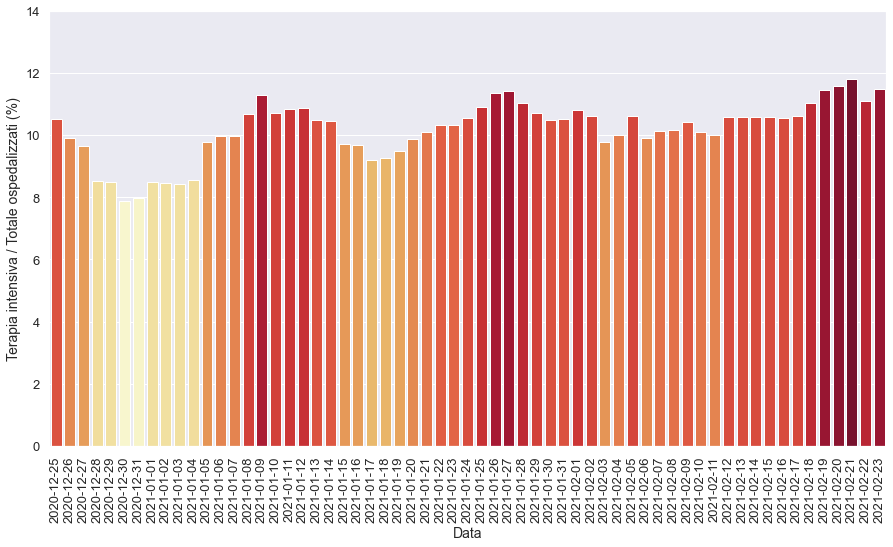

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

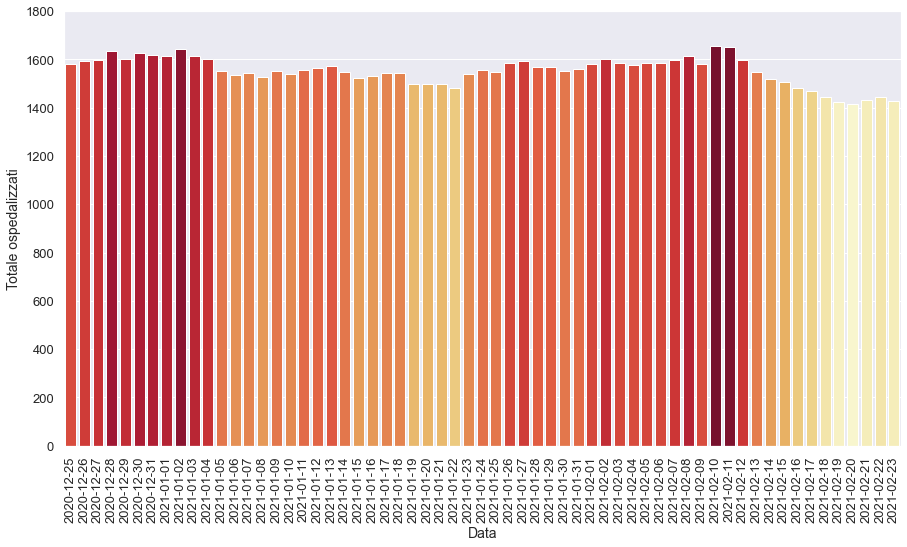

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

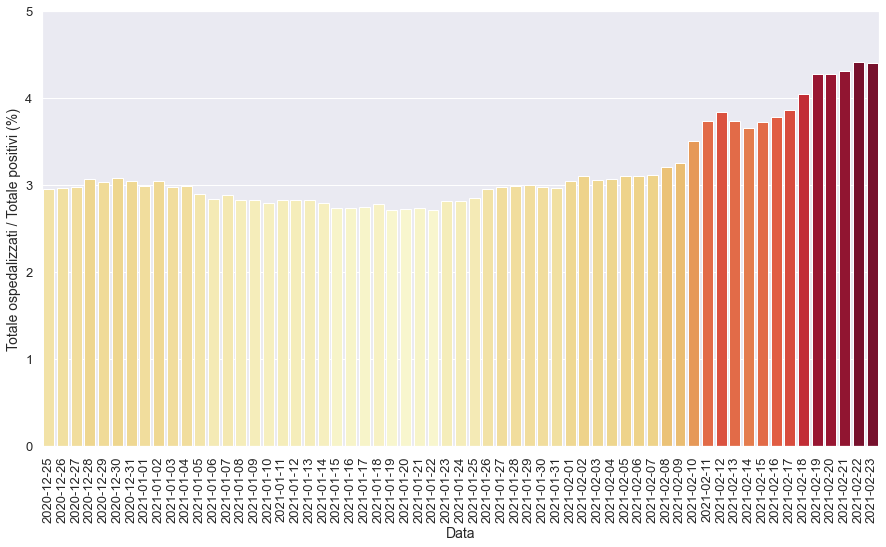

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

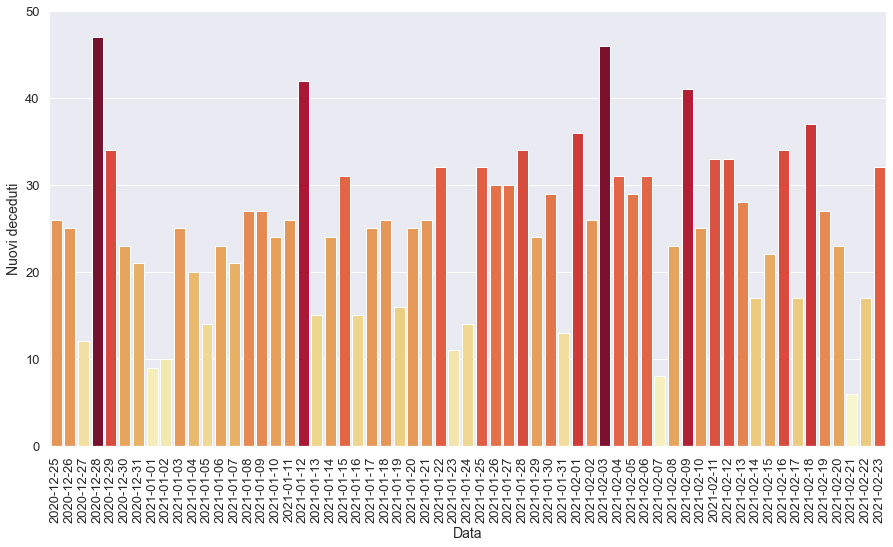

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

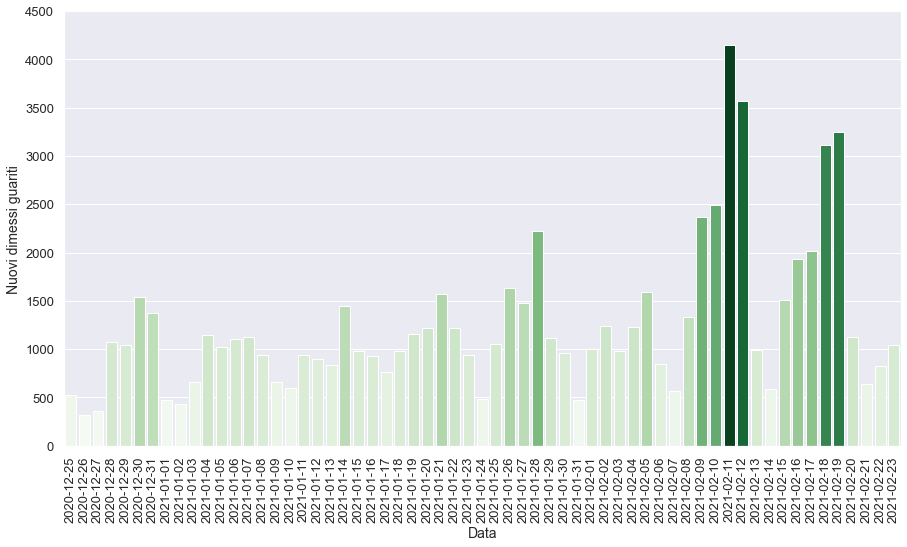

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-24T17:00:00,16,Puglia,1391,164,1555,53515,55070,455,954,...,14.0,8623.0,1387.0,440.0,10.55,2.82,11.06,68.78,3.14,0.83
1,2021-01-25T17:00:00,16,Puglia,1380,169,1549,52833,54382,-688,401,...,32.0,3949.0,2105.0,-682.0,10.91,2.85,10.15,19.05,3.05,-1.25
2,2021-01-26T17:00:00,16,Puglia,1403,180,1583,52132,53715,-667,995,...,30.0,11790.0,5224.0,-701.0,11.37,2.95,8.44,19.05,6.51,-1.23
3,2021-01-27T17:00:00,16,Puglia,1410,182,1592,51851,53443,-272,1233,...,30.0,11802.0,4158.0,-281.0,11.43,2.98,10.45,29.65,1.11,-0.51
4,2021-01-28T17:00:00,16,Puglia,1394,173,1567,50781,52348,-1095,1159,...,34.0,9412.0,3789.0,-1070.0,11.04,2.99,12.31,30.59,-4.95,-2.05
5,2021-01-29T17:00:00,16,Puglia,1401,168,1569,50709,52278,-70,1069,...,24.0,8775.0,4961.0,-72.0,10.71,3.00,12.18,21.55,-2.89,-0.13
6,2021-01-30T17:00:00,16,Puglia,1389,163,1552,50605,52157,-121,871,...,29.0,9690.0,4083.0,-104.0,10.50,2.98,8.99,21.33,-2.98,-0.23
7,2021-01-31T17:00:00,16,Puglia,1397,164,1561,51183,52744,587,1069,...,13.0,8186.0,1078.0,578.0,10.51,2.96,13.06,99.17,0.61,1.13
8,2021-02-01T17:00:00,16,Puglia,1411,171,1582,50502,52084,-660,379,...,36.0,4122.0,2276.0,-681.0,10.81,3.04,9.19,16.65,4.27,-1.25
9,2021-02-02T17:00:00,16,Puglia,1432,170,1602,50100,51702,-382,879,...,26.0,8701.0,5325.0,-402.0,10.61,3.10,10.10,16.51,-0.58,-0.73


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

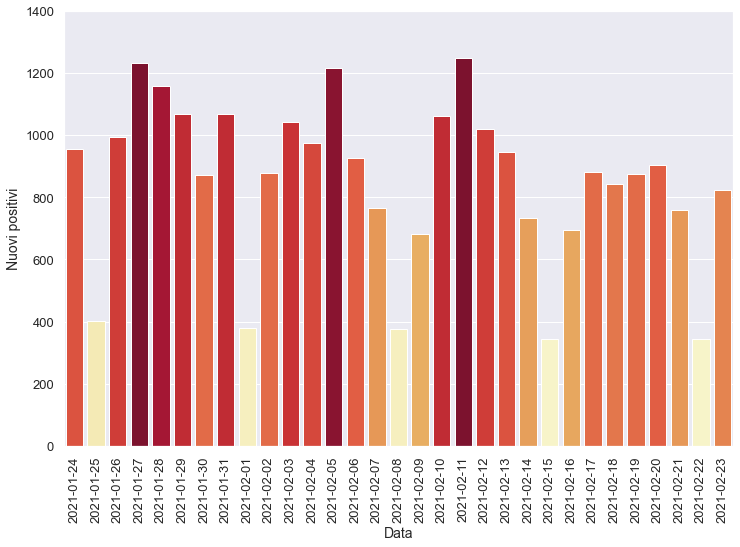

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

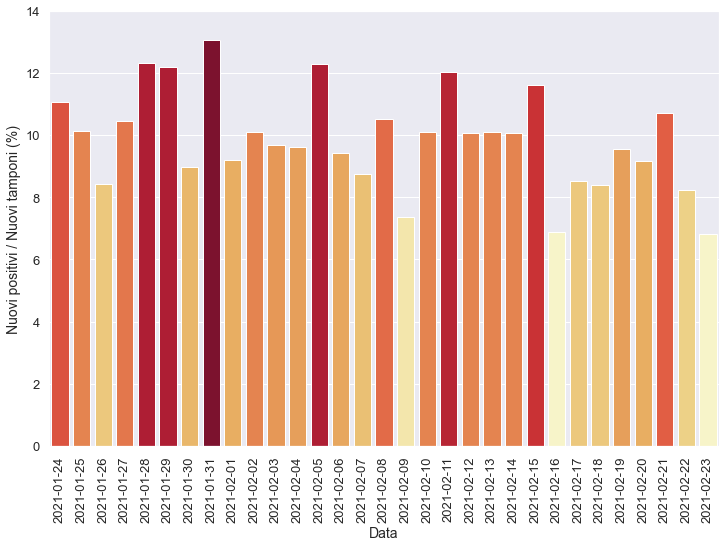

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

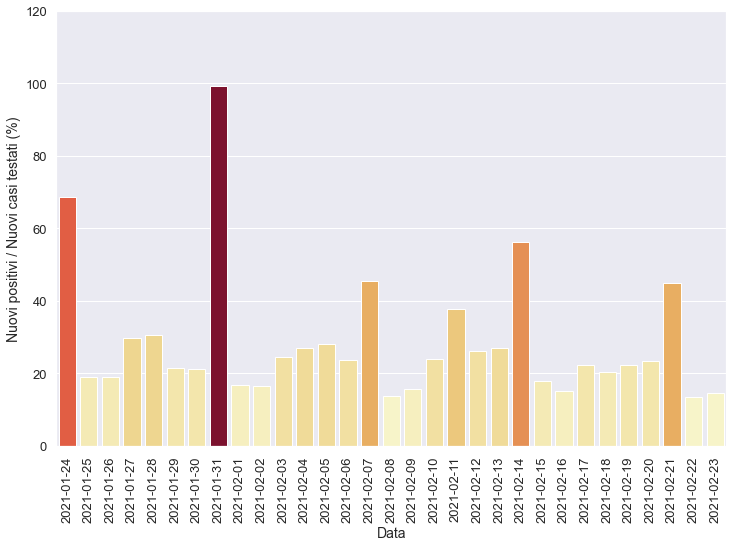

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

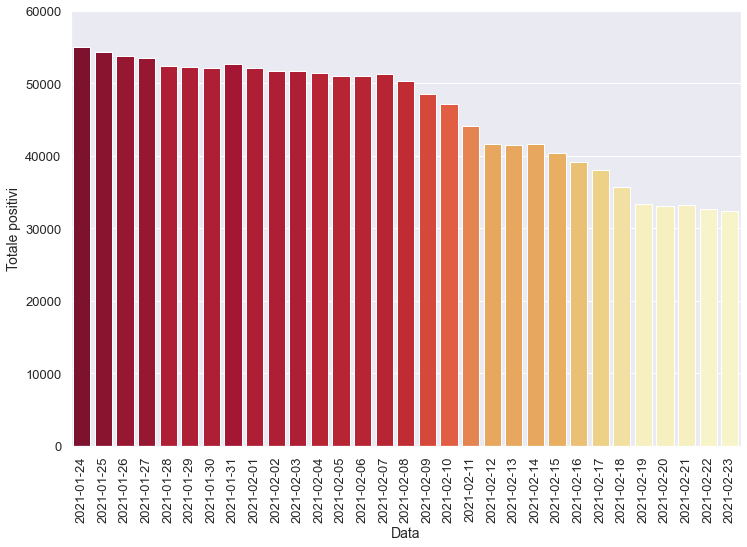

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

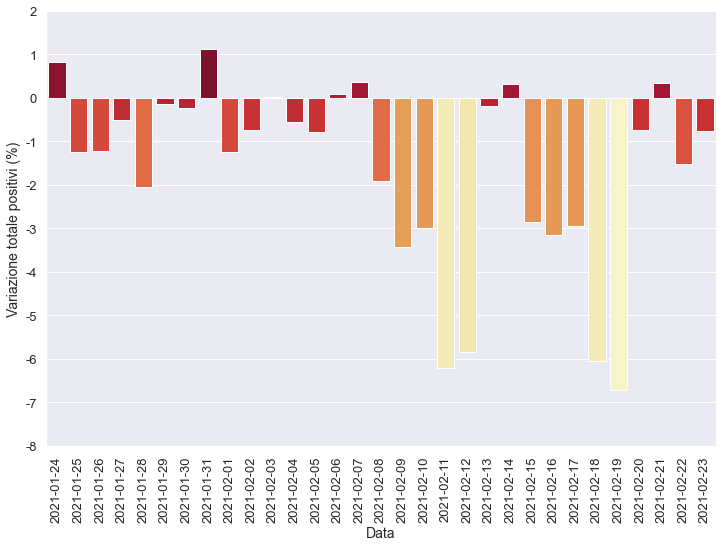

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

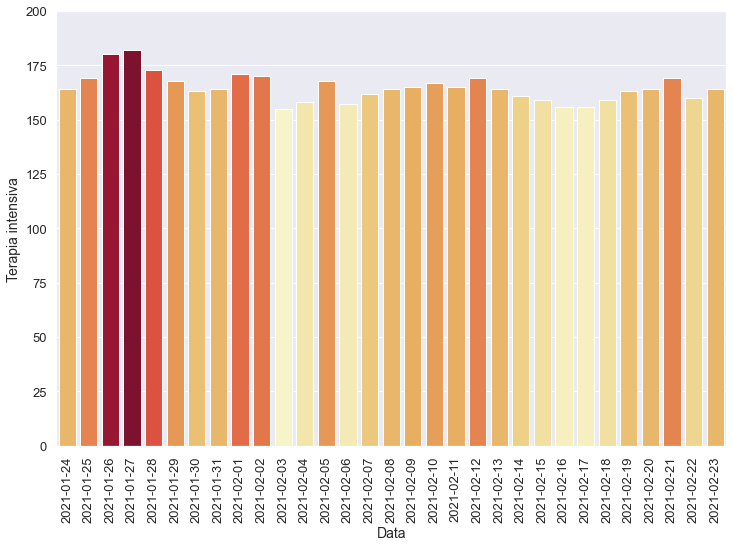

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

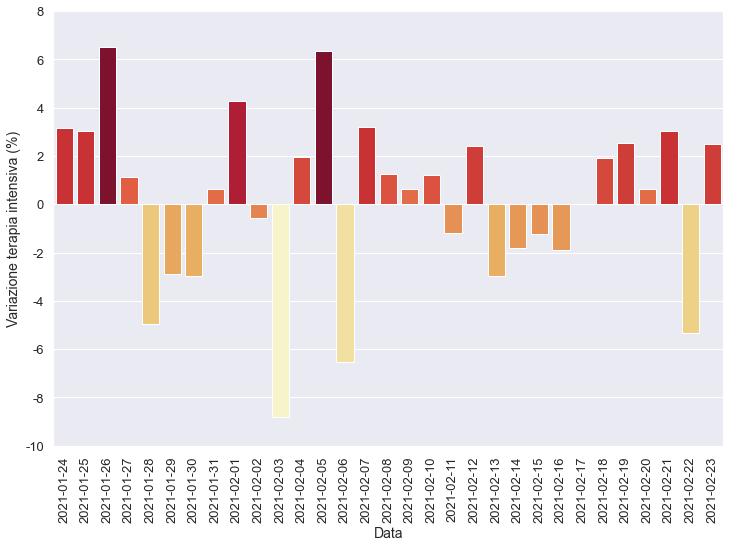

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

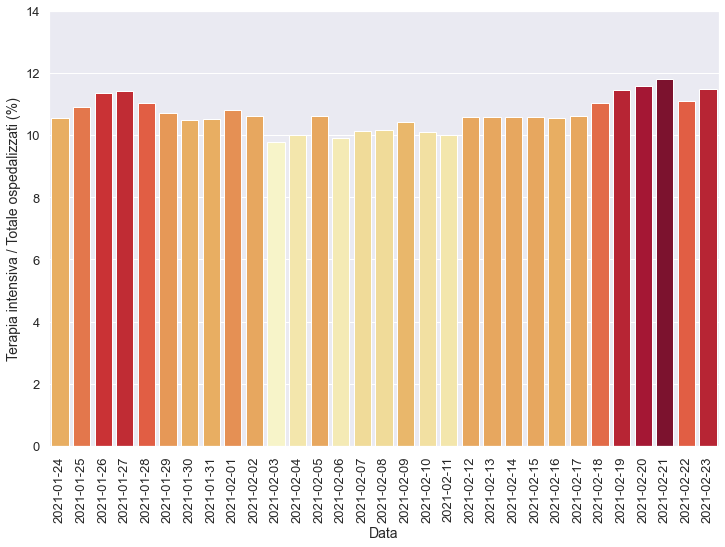

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

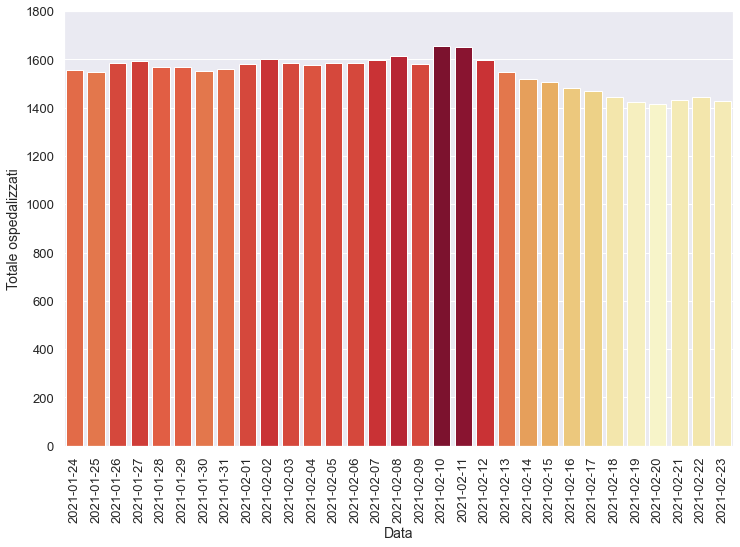

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

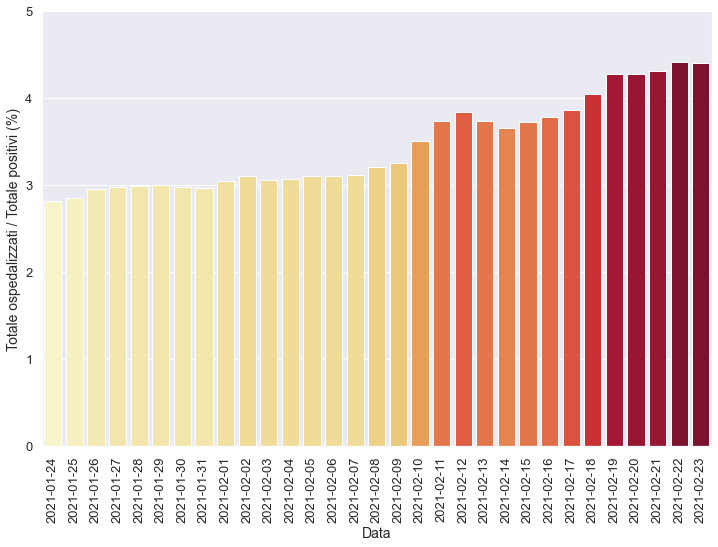

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

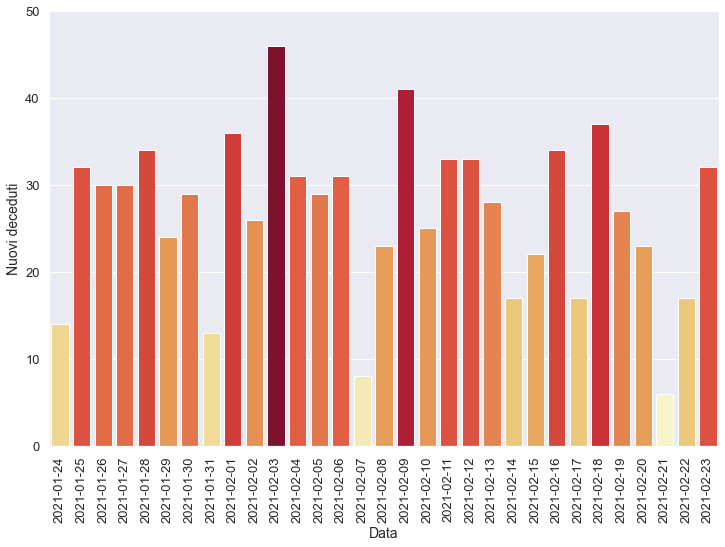

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

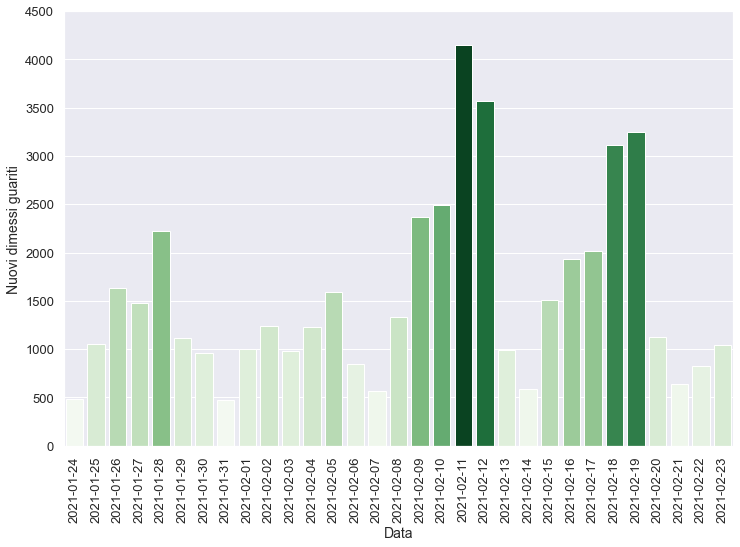

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-16T17:00:00,16,Puglia,1324,156,1480,37708,39188,-1276,694,...,34.0,10100.0,4584.0,-1252.0,10.54,3.78,6.87,15.14,-1.89,-3.15
1,2021-02-17T17:00:00,16,Puglia,1314,156,1470,36564,38034,-1154,883,...,17.0,10374.0,3960.0,-1144.0,10.61,3.86,8.51,22.30,0.00,-2.94
2,2021-02-18T17:00:00,16,Puglia,1283,159,1442,34287,35729,-2305,844,...,37.0,10033.0,4152.0,-2277.0,11.03,4.04,8.41,20.33,1.92,-6.06
3,2021-02-19T17:00:00,16,Puglia,1261,163,1424,31906,33330,-2399,874,...,27.0,9141.0,3921.0,-2381.0,11.45,4.27,9.56,22.29,2.52,-6.71
4,2021-02-20T17:00:00,16,Puglia,1251,164,1415,31669,33084,-246,905,...,23.0,9880.0,3852.0,-237.0,11.59,4.28,9.16,23.49,0.61,-0.74
5,2021-02-21T17:00:00,16,Puglia,1262,169,1431,31767,33198,114,758,...,6.0,7083.0,1683.0,98.0,11.81,4.31,10.70,45.04,3.05,0.34
6,2021-02-22T17:00:00,16,Puglia,1282,160,1442,31253,32695,-503,343,...,17.0,4161.0,2530.0,-514.0,11.10,4.41,8.24,13.56,-5.33,-1.52
7,2021-02-23T17:00:00,16,Puglia,1265,164,1429,31013,32442,-253,823,...,32.0,12067.0,5701.0,-240.0,11.48,4.40,6.82,14.44,2.50,-0.77


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

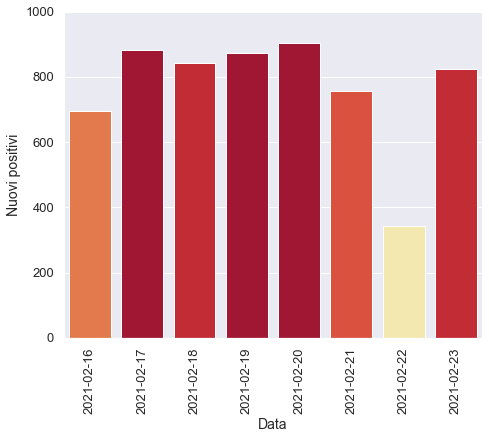

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

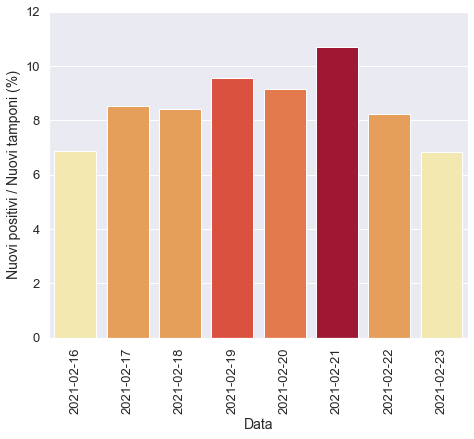

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

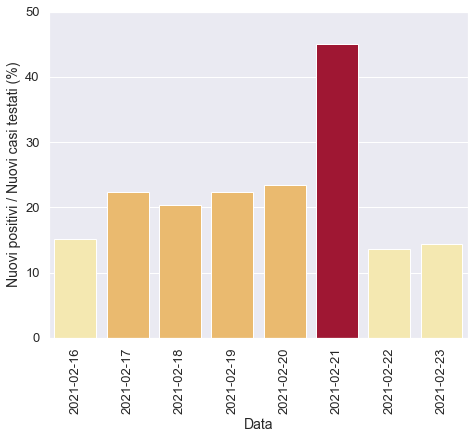

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

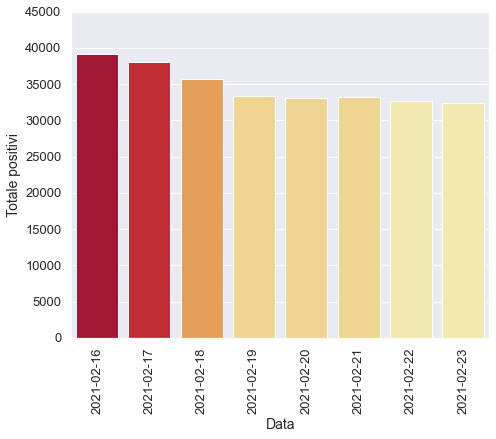

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

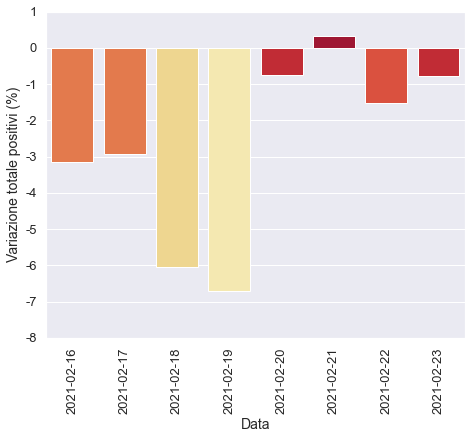

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

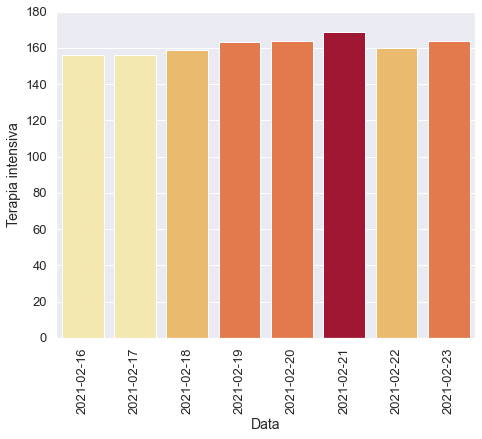

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

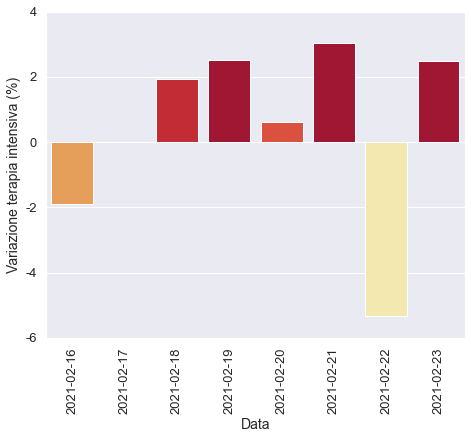

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

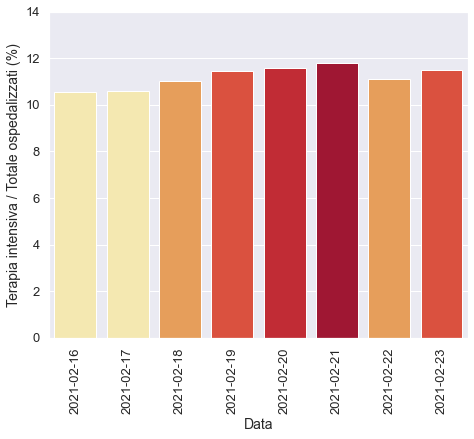

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

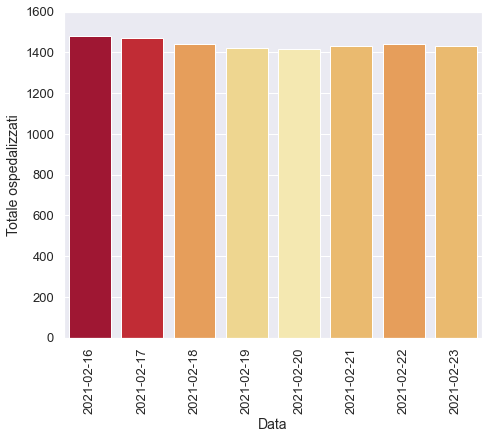

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

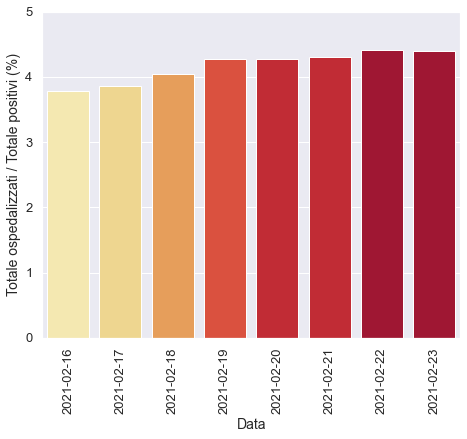

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

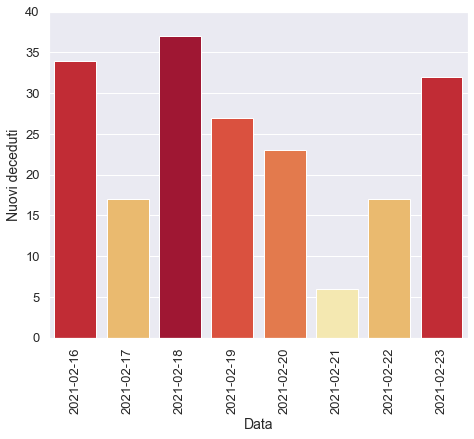

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

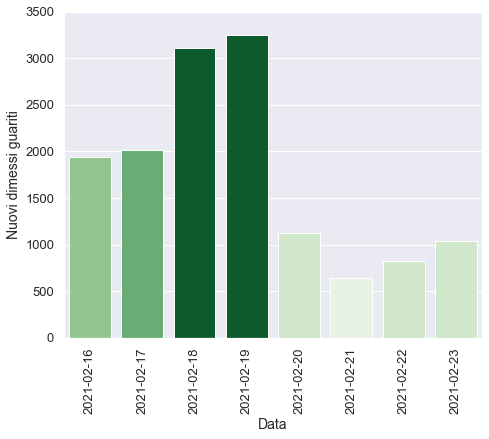

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)